# wrf-python Demo
#### Spring 2021 Geog 288CJ
##### Merissa Coello

wrf-python documentation: https://wrf-python.readthedocs.io/en/latest/

In [17]:
# core scientific libraries
import os
import sys
import numpy as np
import pandas as pd
import xarray as xr
import datetime

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# secondary libraries
import netCDF4 as nc
from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords, interplevel, CoordPair, vertcross, g_uvmet, interpline, destagger,
                interp2dxy, ll_to_xy, xy, ALL_TIMES, vinterp)
import metpy.calc as mpcalc
from metpy.units import units

# import pytz

# from xarray.backends.netCDF4_ import NetCDF4DataStore

# import copy 

In [18]:
# Set filepath
datdir = '../input_data/'
filename = 'wrfout_d03_2017-05-22_00:00:00'

# set output filepath
outdir = '/home/sbarc/students/coello/repos/classes/spring_2021/geog_288cj/post_processing/outputs/'
fig_outdir = '/home/sbarc/students/coello/repos/classes/spring_2021/geog_288cj/post_processing/outputs/figures/'
dat_outdir = '/home/sbarc/students/coello/repos/classes/spring_2021/geog_288cj/post_processing/outputs/data/'


# open wrf Dataset object
filepath = datdir + filename
print('Opened File:', filepath, '\n')

# Open NetCDF Dataset object
f = nc.Dataset(filepath,'r')

Opened File: ../input_data/wrfout_d03_2017-05-22_00:00:00 



In [14]:
# Print all file metadata
print(f)   # or run 'ncdump -h <filename>' in terminal

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    TITLE:  OUTPUT FROM WRF V4.2.2 MODEL
    START_DATE: 2017-05-22_00:00:00
    SIMULATION_START_DATE: 2017-05-22_00:00:00
    WEST-EAST_GRID_DIMENSION: 157
    SOUTH-NORTH_GRID_DIMENSION: 136
    BOTTOM-TOP_GRID_DIMENSION: 55
    DX: 2000.0
    DY: 2000.0
    AERCU_OPT: 0
    AERCU_FCT: 1.0
    IDEAL_CASE: 0
    DIFF_6TH_SLOPEOPT: 0
    AUTO_LEVELS_OPT: 2
    DIFF_6TH_THRESH: 0.1
    DZBOT: 50.0
    DZSTRETCH_S: 1.3
    DZSTRETCH_U: 1.1
    SKEBS_ON: 0
    SPEC_BDY_FINAL_MU: 1
    USE_Q_DIABATIC: 0
    GRIDTYPE: C
    DIFF_OPT: 2
    KM_OPT: 4
    DAMP_OPT: 3
    DAMPCOEF: 0.2
    KHDIF: 0.0
    KVDIF: 0.0
    MP_PHYSICS: 6
    RA_LW_PHYSICS: 4
    RA_SW_PHYSICS: 4
    SF_SFCLAY_PHYSICS: 5
    SF_SURFACE_PHYSICS: 4
    BL_PBL_PHYSICS: 5
    CU_PHYSICS: 0
    SF_LAKE_PHYSICS: 0
    SURFACE_INPUT_SOURCE: 1
    SST_UPDATE: 1
    GRID_FDDA: 0
    GFDDA_INTERVAL_M: 0
    GFDDA_END_H: 0
    GRID_SFDDA: 0


In [19]:
# # List variable names
# print("Variables:")
print(f.variables.keys(),'\n')

dict_keys(['Times', 'XLAT', 'XLONG', 'LU_INDEX', 'ZNU', 'ZNW', 'ZS', 'DZS', 'VAR_SSO', 'U', 'V', 'W', 'PH', 'PHB', 'T', 'THM', 'HFX_FORCE', 'LH_FORCE', 'TSK_FORCE', 'HFX_FORCE_TEND', 'LH_FORCE_TEND', 'TSK_FORCE_TEND', 'MU', 'MUB', 'NEST_POS', 'P', 'PB', 'FNM', 'FNP', 'RDNW', 'RDN', 'DNW', 'DN', 'CFN', 'CFN1', 'THIS_IS_AN_IDEAL_RUN', 'P_HYD', 'Q2', 'T2', 'TH2', 'PSFC', 'U10', 'V10', 'RDX', 'RDY', 'AREA2D', 'DX2D', 'RESM', 'ZETATOP', 'CF1', 'CF2', 'CF3', 'ITIMESTEP', 'XTIME', 'QVAPOR', 'QCLOUD', 'QRAIN', 'QICE', 'QSNOW', 'QGRAUP', 'SHDMAX', 'SHDMIN', 'SNOALB', 'TSLB', 'SMOIS', 'SH2O', 'SEAICE', 'XICEM', 'SFROFF', 'UDROFF', 'IVGTYP', 'ISLTYP', 'VEGFRA', 'GRDFLX', 'ACGRDFLX', 'ACSNOM', 'SNOW', 'SNOWH', 'CANWAT', 'SSTSK', 'COSZEN', 'LAI', 'QKE', 'NUPDRAFT', 'KTOP_PLUME', 'MAXMF', 'VAR', 'TKE_PBL', 'EL_PBL', 'MAPFAC_M', 'MAPFAC_U', 'MAPFAC_V', 'MAPFAC_MX', 'MAPFAC_MY', 'MAPFAC_UX', 'MAPFAC_UY', 'MAPFAC_VX', 'MF_VX_INV', 'MAPFAC_VY', 'F', 'E', 'SINALPHA', 'COSALPHA', 'HGT', 'TSK', 'P_TOP', 'T

In [5]:
# # Show variavles and all details
# print(f.variables.items(),'\n')

In [6]:
# # Show dimension names and sizes
# print("Dimensions:")
# print(f.dimensions.items(),'\n')

## Extracting Variables with getvar
https://wrf-python.readthedocs.io/en/latest/user_api/generated/wrf.getvar.html#wrf.getvar

In [20]:
# pull temp variable from wrf file
temp = getvar(f, "temp", units = "K", timeidx = 2) # to do all time use ALL_TIMES for timeidx

print(temp)

<xarray.DataArray 'temp' (bottom_top: 54, south_north: 135, west_east: 156)>
array([[[287.1849 , 287.16776, 287.15414, ..., 289.2262 , 289.25424,
         289.27884],
        [287.1499 , 287.13235, 287.1162 , ..., 289.24023, 289.2581 ,
         289.27103],
        [287.1171 , 287.09933, 287.0854 , ..., 289.24698, 289.25378,
         289.2528 ],
        ...,
        [285.9745 , 285.95163, 285.92697, ..., 290.77725, 290.38116,
         290.52405],
        [285.94394, 285.91705, 285.88568, ..., 292.17453, 291.77545,
         291.8327 ],
        [285.91135, 285.881  , 285.8412 , ..., 293.79382, 293.34506,
         293.3579 ]],

       [[286.58206, 286.5639 , 286.54752, ..., 288.67844, 288.71   ,
         288.7317 ],
        [286.54474, 286.52597, 286.51016, ..., 288.68958, 288.70703,
         288.71994],
        [286.51123, 286.4922 , 286.47565, ..., 288.69073, 288.69632,
         288.69107],
...
        [214.3284 , 214.32706, 214.32565, ..., 214.63763, 214.61752,
         214.6141 ],
    

## Quick Plot of Horizontal Temp Variable

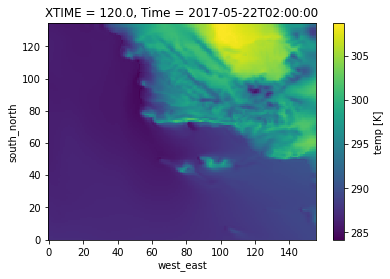

In [8]:
temp.sel(bottom_top = 0).plot()

## Vertical Interpolation with vinterp
https://wrf-python.readthedocs.io/en/latest/user_api/generated/wrf.vinterp.html#wrf.vinterp

In [21]:
# specify the z levels to interpolate to [km]
v_levels = np.arange(0, 21, 0.05)

# interpolate to z levels specified above
temp_interp = vinterp(wrfin = f, field = temp, vert_coord = 'ght_msl', interp_levels = v_levels, timeidx = 2)

# change vertical coordinates to meters
temp_interp['interp_level'] = temp_interp['interp_level']*1000

print(temp_interp)

<xarray.DataArray 'temp' (interp_level: 420, south_north: 135, west_east: 156)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[286.9221 , 286.90448, 286.88962, ..., 288.9921 , 289.02182,
         289.04523],
        [286.88602, 286.8679 , 286.85187, ..., 289.00504, 289.02286,
         289.0357 ],
        [286.8528 , 286.83447, 286.81937, ..., 289.0094 , 289.01572,
         289.0128 ],
...
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
 

## Changing Names of Coordinates

In [10]:
# remane dimensions with ugly names
temp_interp_renamed = temp_interp.rename({'south_north':'lat', 'west_east':'lon', 'XTIME':'time', 'XLAT':'lat_grid', 
                    'XLONG':'lon_grid', 'interp_level':'z'})

# pull lat and lon vallues and replace current corrdinates
lats = temp_interp_renamed.lat_grid.values[:,0]
lons = temp_interp_renamed.lon_grid.values[0,:]

temp_interp_renamed['lat'] = lats
temp_interp_renamed['lon'] = lons


print(temp_interp_renamed)

<xarray.DataArray 'temp' (z: 420, lat: 135, lon: 156)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[286.9221 , 286.90448, 286.88962, ..., 288.9921 , 289.02182,
         289.04523],
        [286.88602, 286.8679 , 286.85187, ..., 289.00504, 289.02286,
         289.0357 ],
        [286.8528 , 286.83447, 286.81937, ..., 289.0094 , 289.01572,
         289.0128 ],
...
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       

## Quick Plot of Vertical Cross Section of Temp Variable

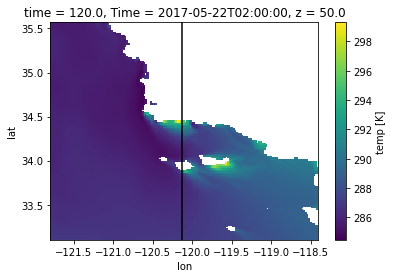

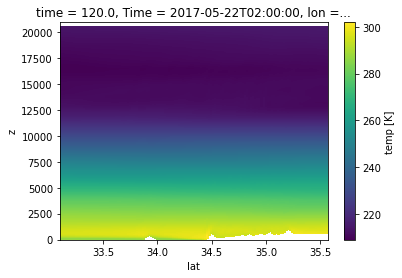

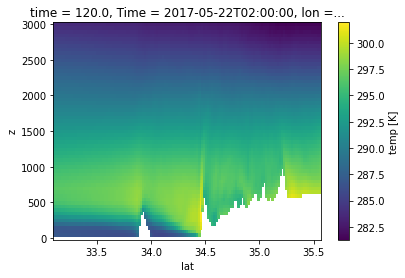

In [11]:
# plot horizontal cross section with vertical cross section line
temp_interp_renamed.sel(z = 50).plot()
plt.vlines(x = -120.13048, ymin = 32, ymax = 36)
plt.show()

# plot vertical cross section
temp_interp_renamed.sel(lon = -120.13048).plot()
plt.show()

# plot vertical cross section but limit z direction
temp_interp_renamed.sel(lon = -120.13048, z = slice(0,3000)).plot()
plt.show()

## Saving Processed Data as netcdf
### Requires changing format of projection since there is an exsisting wrf-python and netcdf incompatability with projection format
https://github.com/NCAR/wrf-python/issues/91

In [12]:
# fix projection labeling for saving as a netcdf https://github.com/NCAR/wrf-python/issues/91
del temp_interp_renamed.attrs['coordinates']

temp_interp_renamed.attrs['projection'] = str(temp_interp_renamed.attrs['projection'])

In [13]:
filename_out = 'temp_class_demo'

temp_interp_renamed.to_netcdf(path = dat_outdir + filename_out)

print('Saved Files As: \n', dat_outdir + filename_out)

Saved Files As: 
 /home/sbarc/students/coello/repos/classes/spring_2021/geog_288cj/post_processing/outputs/data/temp_class_demo
